In [1]:
import os
from pathlib import Path
import logging
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ruptures as rpt

from datetime import datetime
import exchange_calendars as xc

# for Parquet I/O
import pyarrow as pa
import pyarrow.parquet as pq


In [2]:
# Load processed GDEA dataset
data_path_GDEA = Path("../../02_Data_Processed/Carbon_Cleaned_Aligned/GDEA_processed.parquet")
data_path_HBEA = Path("../../02_Data_Processed/Carbon_Cleaned_Aligned/HBEA_processed.parquet")
df_GDEA = pd.read_parquet(data_path_GDEA)
df_HBEA = pd.read_parquet(data_path_HBEA)

In [3]:
# Set plot style
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

pd.set_option('future.no_silent_downcasting', True)

In [4]:
def plot_Region_TimeSeries(df, region_name):
    # Create figure with subplots for time series and turnover
    fig = plt.figure(figsize=(15, 8), dpi=300)

    # 1. Time Series Plot: Close Price and Volume
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(df.index, df['close'], label='Close Price (CNY/ton)', color='blue', linewidth=1.5)
    ax1.set_title(f'{region_name} Close Price and Trading Volume')
    ax1.set_ylabel('Close Price (CNY/ton)')
    ax1.legend(loc='upper left')

    # Secondary axis for volume
    ax1_twin = ax1.twinx()
    ax1_twin.bar(df.index, df['volume_tons'], alpha=0.3, color='green', label='Volume (tons)')
    ax1_twin.set_ylabel('Volume (tons)')
    ax1_twin.legend(loc='upper right')

    # 2. Cumulative Turnover Plot
    ax2 = fig.add_subplot(2, 1, 2)
    ax2.plot(df.index, df['cum_turnover_cny'] / 1e9, label='Cumulative Turnover (Billion CNY)', color='purple', linewidth=1.5)
    ax2.set_title(f'{region_name} Cumulative Turnover')
    ax2.set_ylabel('Cumulative Turnover (Billion CNY)')
    ax2.legend(loc='upper left')

    # Adjust layout for main figure
    plt.tight_layout()

    # Save and show main plot
    plt.savefig(f'{region_name}_visualization.png', bbox_inches='tight', dpi=300)
    plt.show()

    # 3. Trading Activity Heatmap (separate figure, daily granularity)
    fig_heatmap = plt.figure(figsize=(20, 6), dpi=300)

    # Prepare data for daily heatmap
    df['year'] = df.index.year
    df['status'] = np.where(df['is_open'] & df['has_trade'], 'Trading',
                            np.where(df['is_open'] & df['is_quiet'], 'Quiet', 'Non-Trading'))
    # Create a pivot table with days as columns and years as rows
    status_pivot = df.pivot_table(index='year', columns=df.index, values='status', aggfunc='first')
    status_numeric = status_pivot.replace({'Trading': 1, 'Quiet': 0, 'Non-Trading': -1}).fillna(-1).astype(int)

    # 3. Missing Data Plot (separate figure)
    fig_missing = plt.figure(figsize=(10, 4), dpi=300)
    missing = df[['close', 'vwap']].isna().groupby(df.index.year).sum()
    missing.plot(kind='bar', ax=plt.gca(), color=['blue', 'orange'])
    plt.title(f'{region_name} Missing Values by Year (Close and VWAP)')
    plt.xlabel('Year')
    plt.ylabel('Number of Missing Values')
    plt.legend(['Close', 'VWAP'])
    plt.tight_layout()
    plt.savefig(f'{region_name}_missing_values.png', bbox_inches='tight', dpi=300)
    plt.show()

## Plot processed GDEA

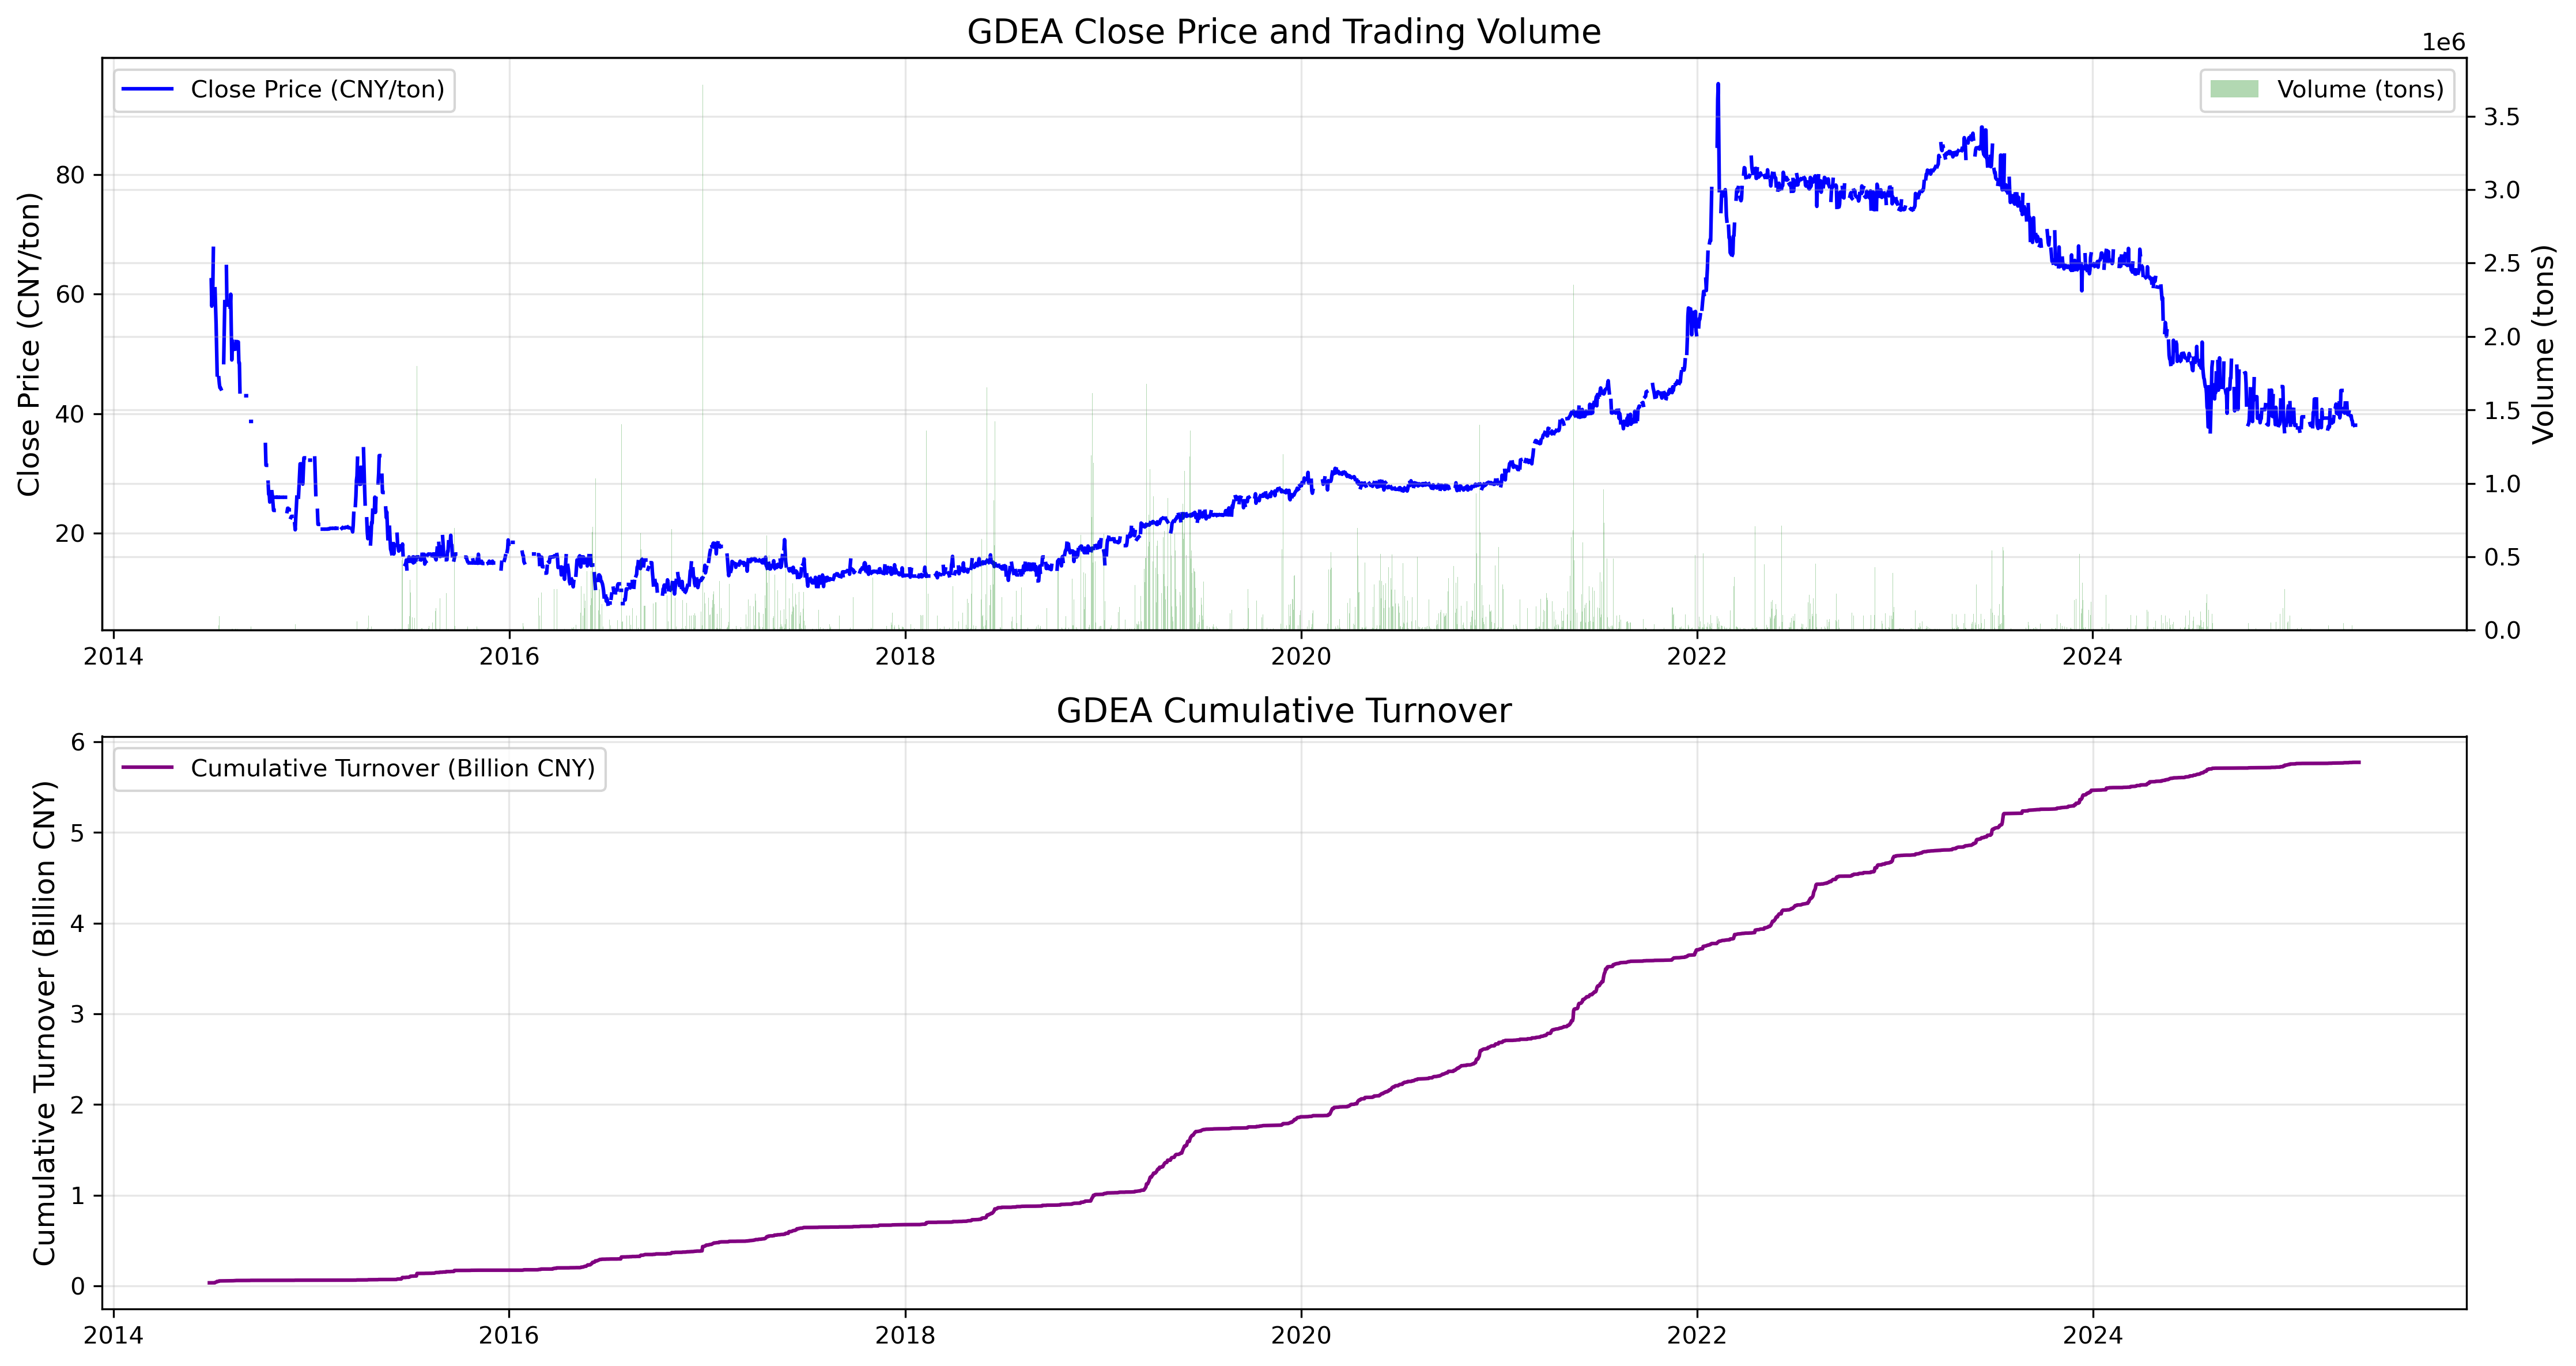

<Figure size 6000x1800 with 0 Axes>

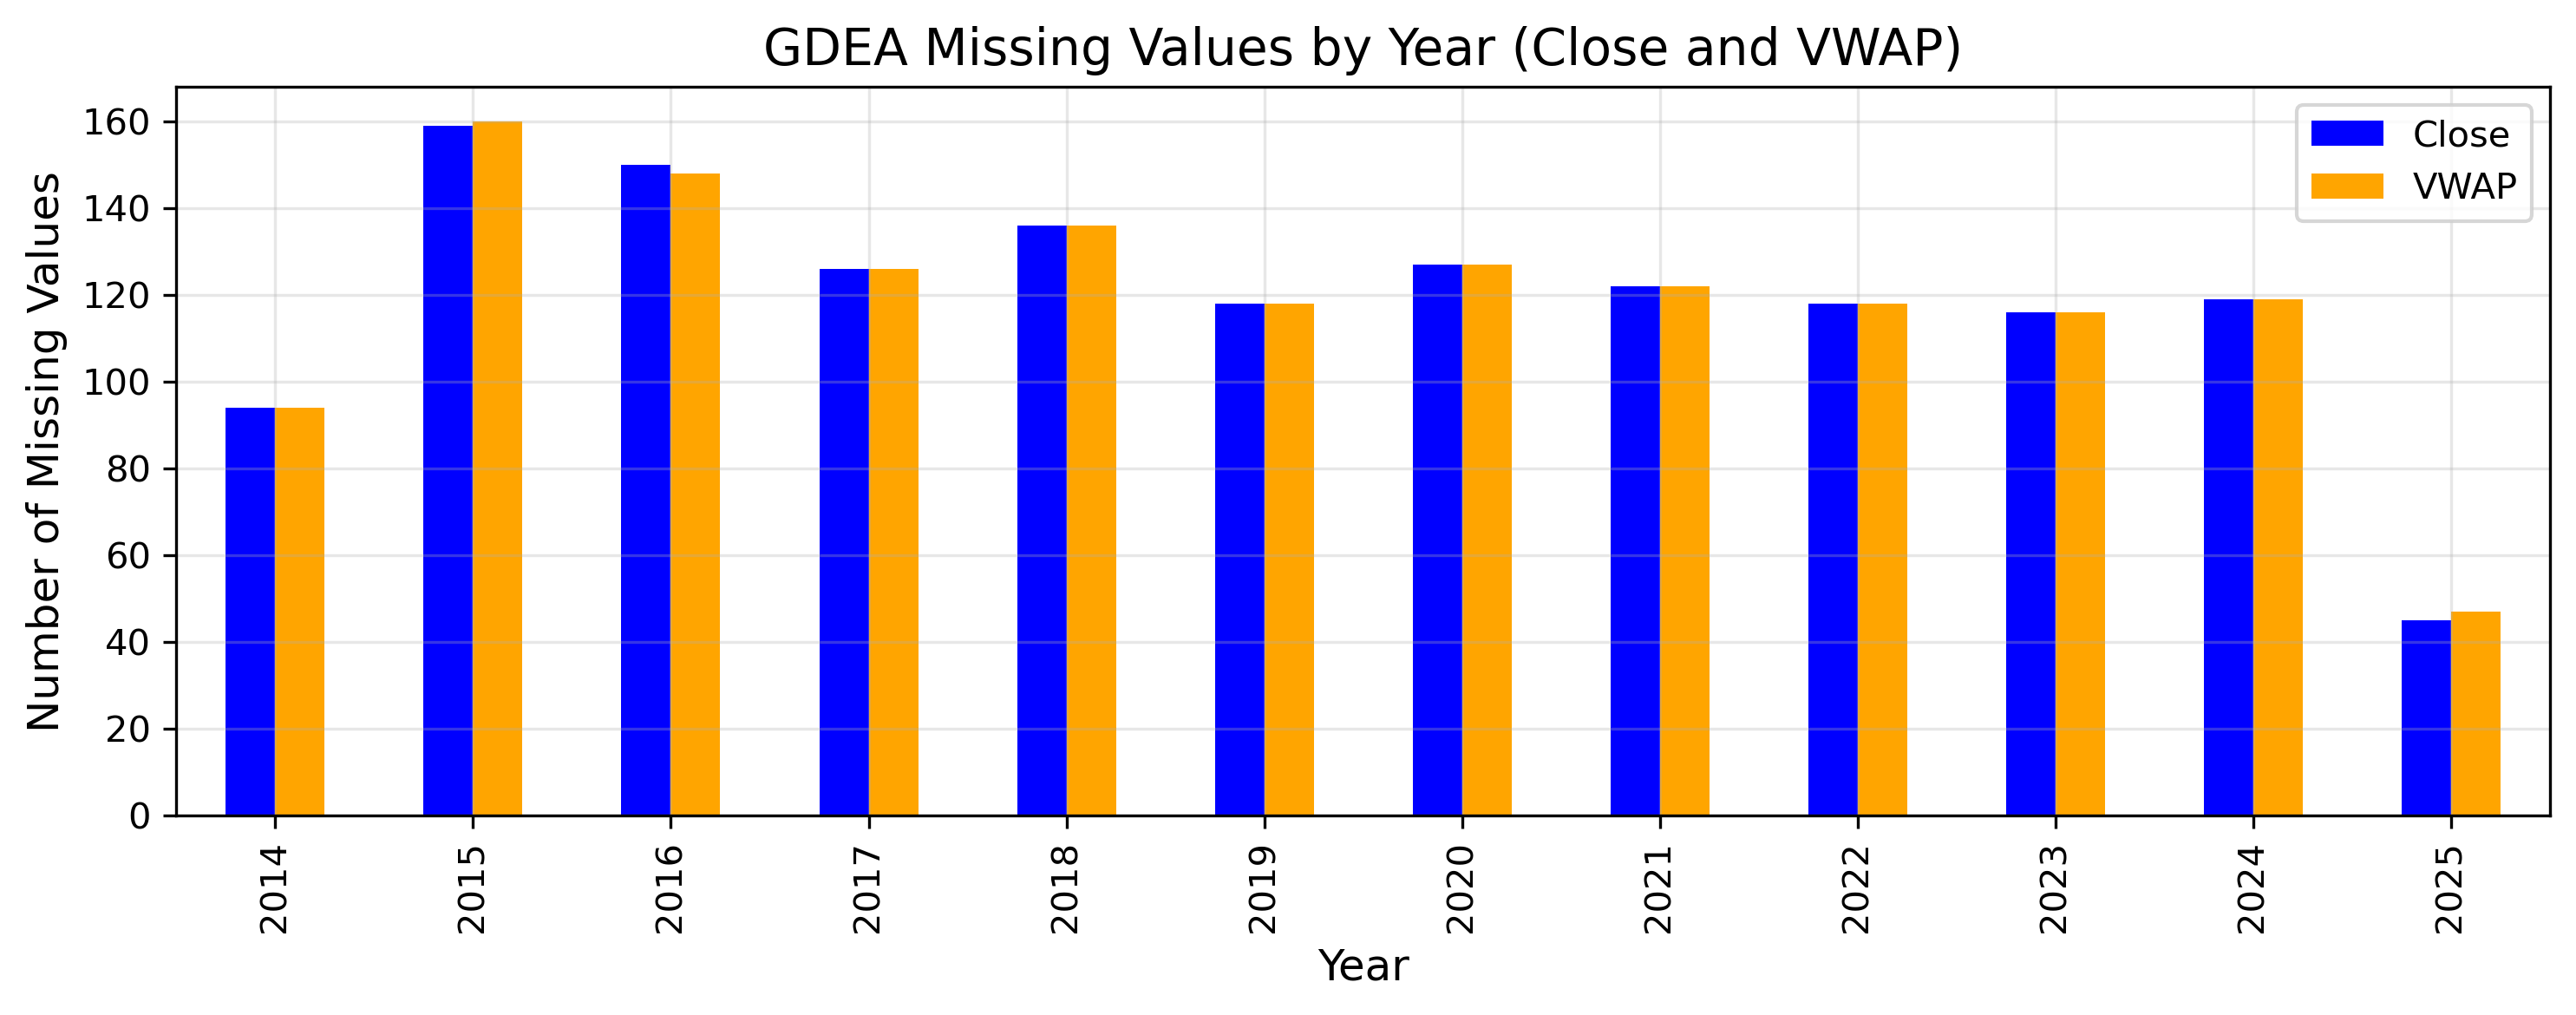

In [5]:
plot_Region_TimeSeries(df_GDEA, "GDEA")

## Plot Processed HBEA

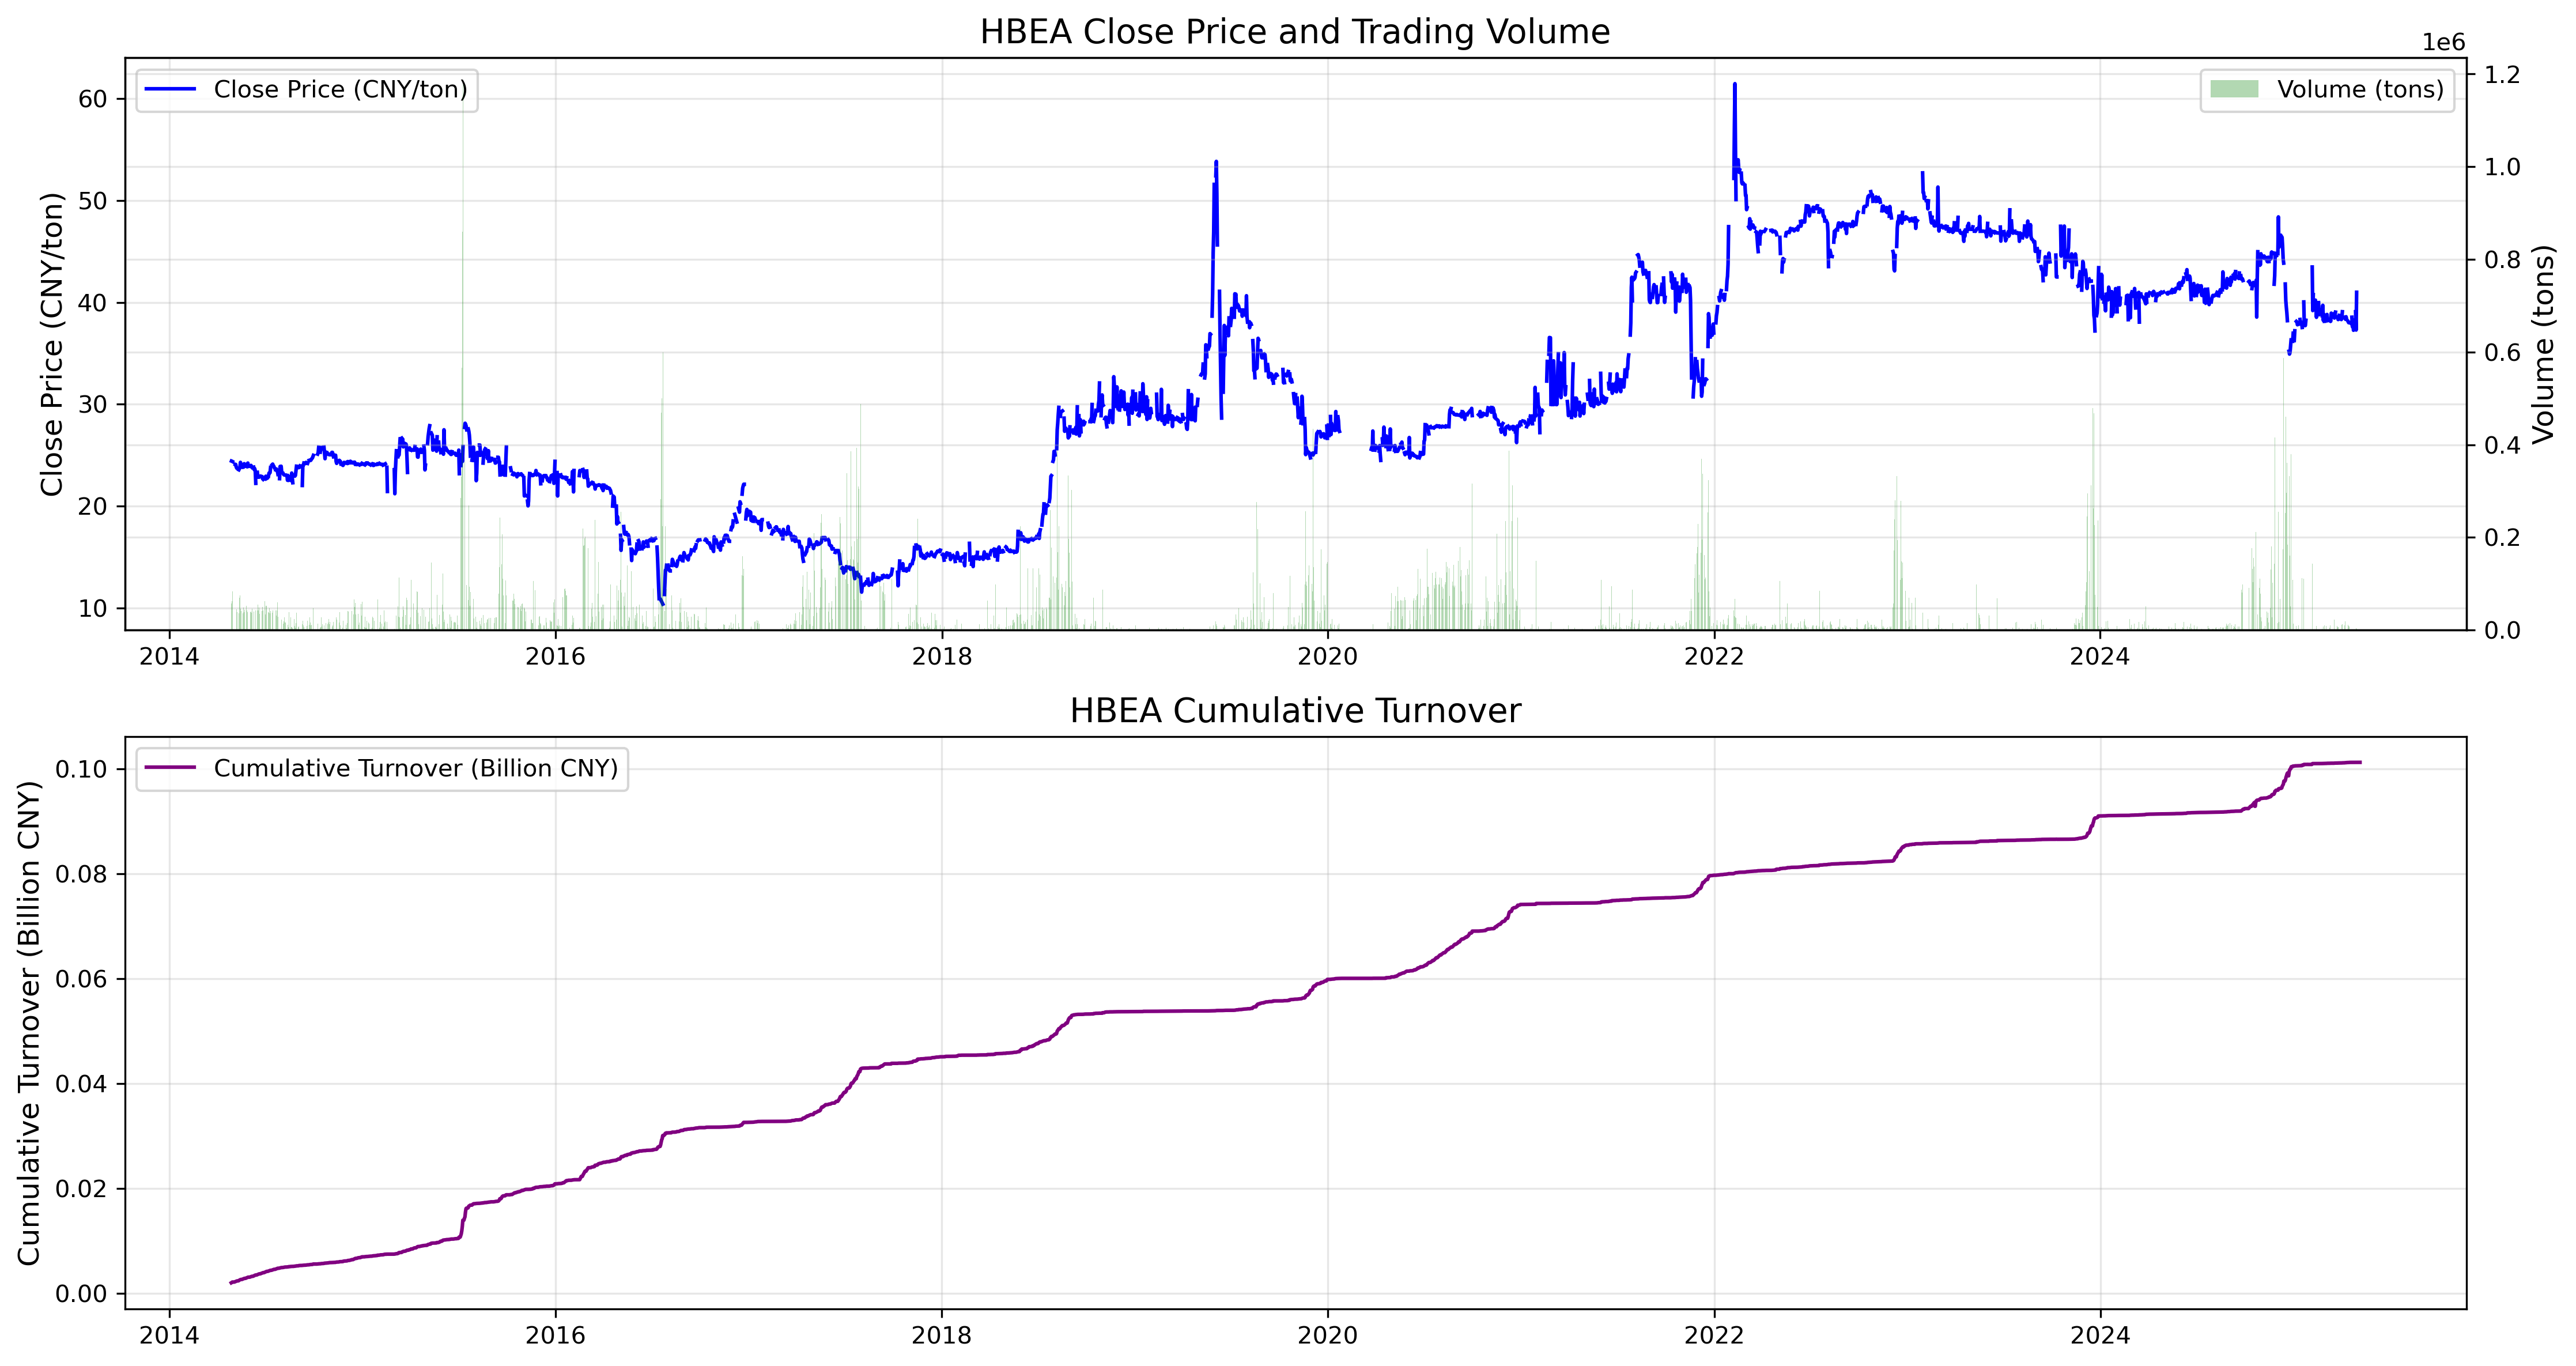

<Figure size 6000x1800 with 0 Axes>

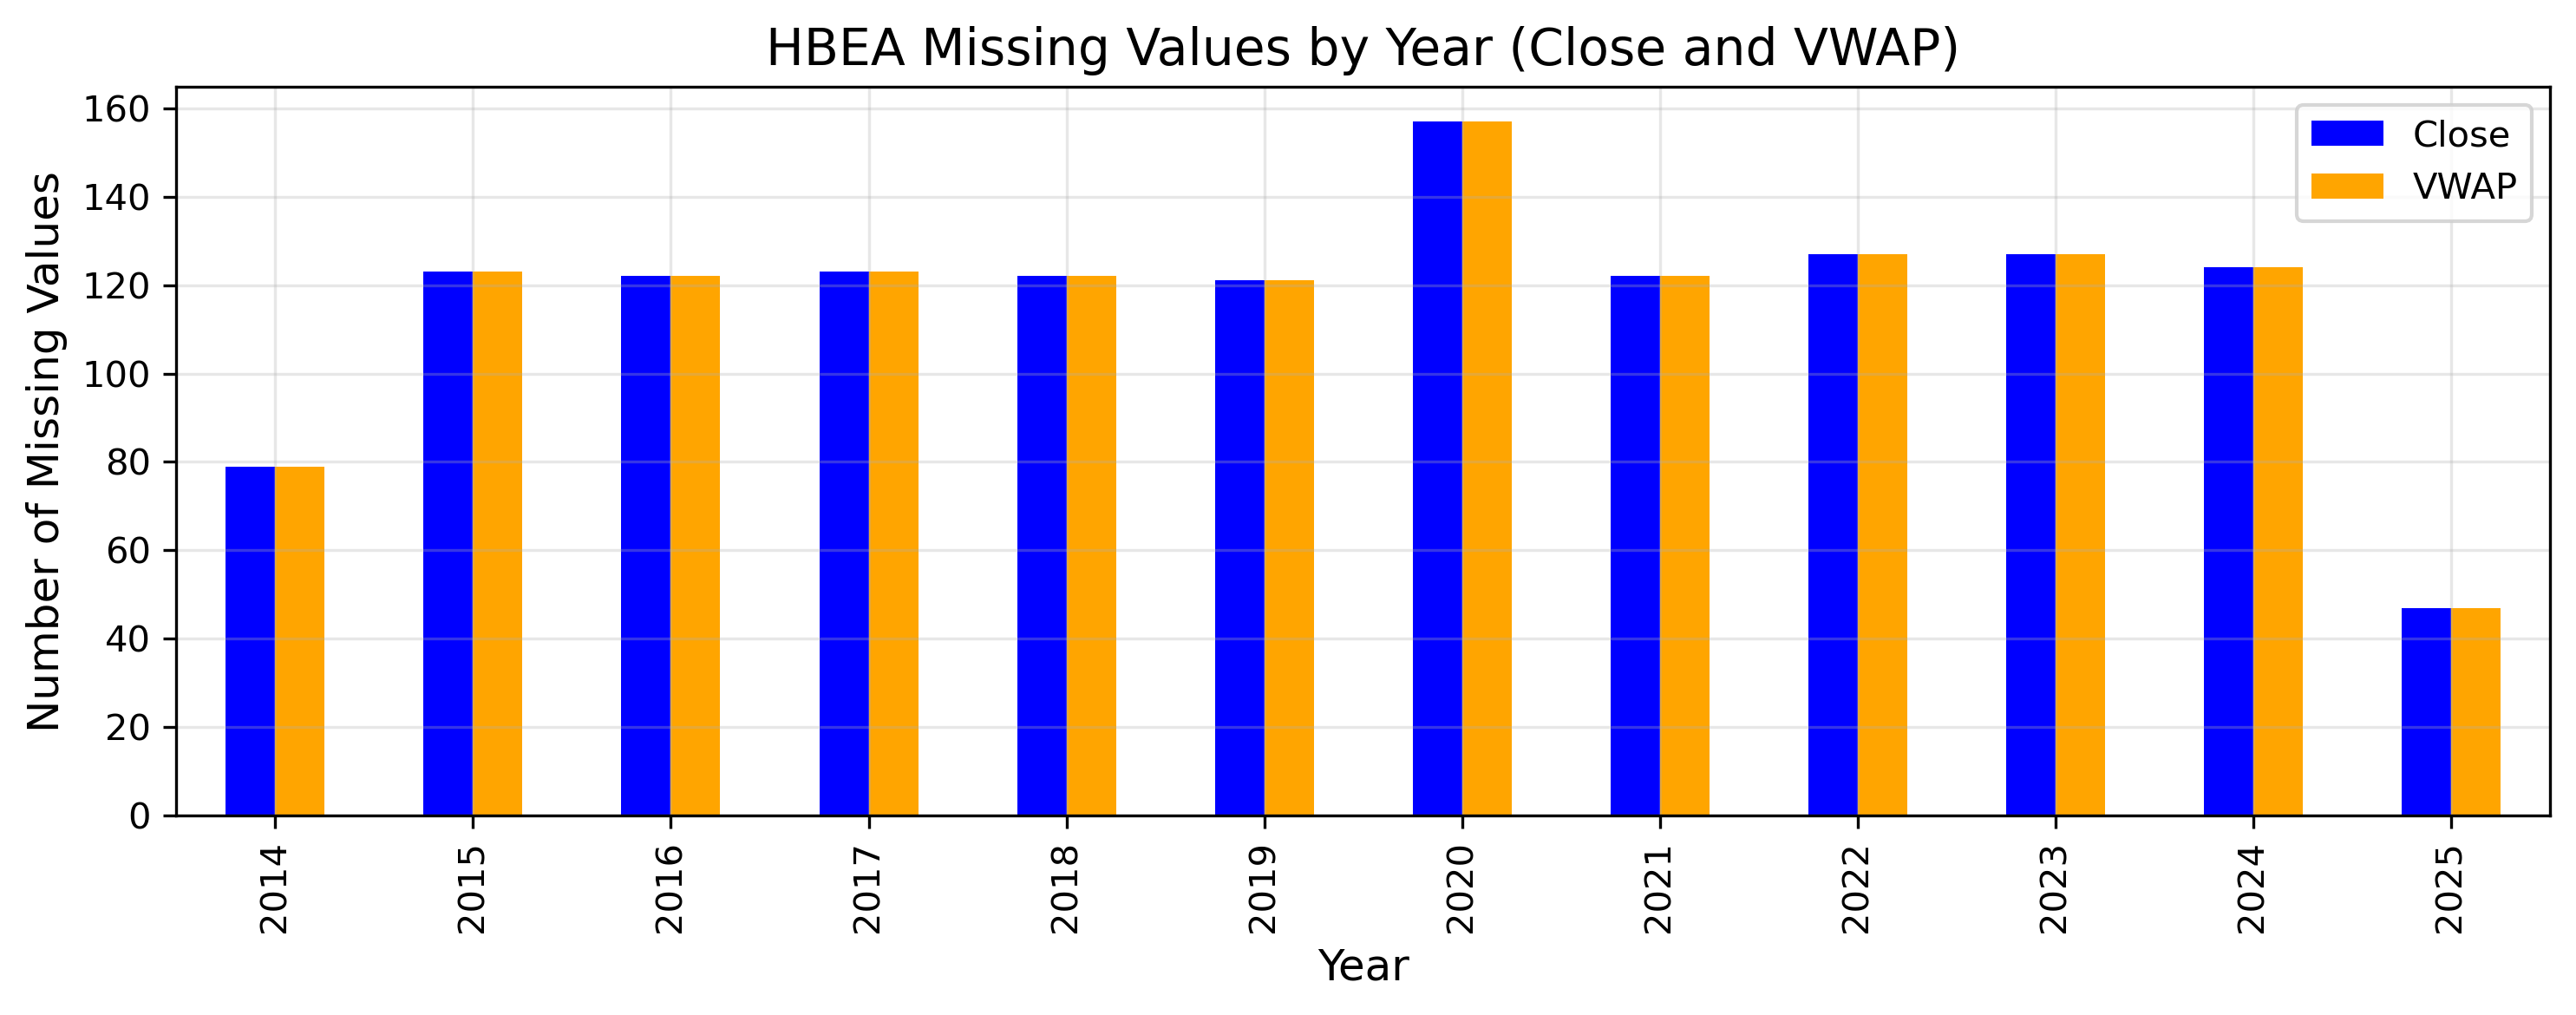

In [6]:
plot_Region_TimeSeries(df_HBEA, "HBEA")